For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy
import matplotlib.pyplot as plt

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
import random
#Generate 20 random numbers between 0 and 20
x = random.sample(range(0,21), 21)
print(x)
print(len(x))

[5, 11, 9, 1, 19, 14, 6, 17, 8, 12, 3, 13, 15, 7, 4, 16, 0, 2, 20, 10, 18]
21


In [3]:
a=-2
b=1
y=[]
for i in range(0,21):
    y.append(a*x[i]+b)
print(y)    
print(len(y))

[-9, -21, -17, -1, -37, -27, -11, -33, -15, -23, -5, -25, -29, -13, -7, -31, 1, -3, -39, -19, -35]
21


#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [4]:
th0=0
th1=0
alpha=0.0001


x    y   h(x)      error
5   -9   0       81
11   -21   0       441
9   -17   0       289
1   -1   0       1
19   -37   0       1369
14   -27   0       729
6   -11   0       121
17   -33   0       1089
8   -15   0       225
12   -23   0       529
3   -5   0       25
13   -25   0       625
15   -29   0       841
7   -13   0       169
4   -7   0       49
16   -31   0       961
0   1   0       1
2   -3   0       9
20   -39   0       1521
10   -19   0       361
18   -35   0       1225


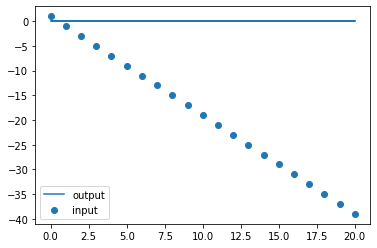

In [5]:
#func to calcolate Hypothesis
def hypo(o1,o2,arr):
    h=[]
    for i in range (0,len(arr)):
        h.append(o1 + o2 *arr[i])
    return h    

#func to calculate error
def err(o1,o2,arr1,arr2):
    r=[]
    h=hypo(o1,o2,arr1)
    for i in range (0,len(arr1)):
        r.append((h[i]-arr2[i])**2)
    return r

#func to calculate h(x)-y(x)
def hminy(o1,o2,arr1,arr2):
    h=hypo(o1,o2,arr1)
    r=[]
    for i in range (0,len(arr1)):
        r.append(h[i]-arr2[i])
    return r

#func to calculate (h(x)-y(x))*x
def hminymulx(o1,o2,arr1,arr2):
    h=hypo(o1,o2,arr1)
    r=[]
    for i in range (0,len(arr1)):
        r.append((h[i]-arr2[i])*arr1[i])
    return r
    
####################################################
print('x','  ','y',' ','h(x)','    ','error')
y1=hypo(th0,th1,x)
er=err(th0,th1,x,y)
hmy=hminy(th0,th1,x,y)
hmyxx=hminymulx(th0,th1,x,y)
h=[]
for i in range (0,len(x)):
    print(x[i],' ',y[i],' ',y1[i],'     ',er[i])
    h.append(th0 + th1*x[i])
   
    
    
plt.scatter(x,y,label='input')
plt.plot(x,h,label='output')
plt.legend()
plt.show()    

In [6]:
#here cost function
def cost(arr):
    sm=0
    sm = numpy.sum(arr)
    #print('cost funtion equal ',(1/(2*len(arr)))*sm) 
    return (1/(2*len(arr)))*sm
cost(er)    

253.83333333333331

In [7]:
#here calculate the optimum value  for theta0 and theta1
#sm0= numpy.sum(hminy)
#sm1=numpy.sum(hminymulx)
#mag0=(alpha*(1/len(hminy))*sm0)
#mag1=(alpha*(1/len(hminy))*sm1)
arrth0=[]
arrth1=[]

tloss=[]
reg=[]
for i in range (0,300):
    
    y1new=hypo(th0,th1,x)
    reg.append(y1new)
    ernew=err(th0,th1,x,y)
    tloss.append(cost(ernew))
    print(cost(ernew))
    fth0=hminy(th0,th1,x,y)    
    sm0= numpy.sum(fth0)   
    mag0=(alpha*(1/len(fth0))*sm0) 
    th0=th0-mag0
    arrth0.append(th0)
    fth1=hminymulx(th0,th1,x,y)    
    sm1= numpy.sum(fth1)   
    mag1=(alpha*(1/len(fth1))*sm1)            
    th1=th1-mag1
    arrth1.append(th1)
    y1new=hypo(th0,th1,x)
    reg.append(y1new)
    
    print(th0,'  ',th1)




253.83333333333331
-0.0018999999999999998    -0.02633143333333333
246.91116985718372
-0.003773478566666666    -0.05230113026587777
240.17790652424748
-0.005620800088544121    -0.0779140606854889
233.62838839968208
-0.007442323947849778    -0.10317512619883937
227.2576012227013
-0.009238404589256153    -0.12808916106953264
221.0606675676937
-0.011009391587727695    -0.15266093314332796
215.03284311009935
-0.012755629715425595    -0.1768951447606537
209.16951299418906
-0.014477459007693398    -0.20079643365658376
203.46618829996345
-0.016175214828136046    -0.22436937384844896
197.91850260646797
-0.017849227932804784    -0.24761847651125402
192.5222086488915
-0.01949982453350025    -0.2705481908410667
187.27317506689084
-0.021127326360205832    -0.29316290490654523
182.16738324165044
-0.022732050722663266    -0.31546694648876644
177.20092421925634
-0.024314310571102234    -0.3374645839095155
172.3699957180287
-0.025874414556135608    -0.359160026848196
167.67089921752188
-0.0274126670878

In [8]:
#y1new=hypo(th0,th1,x)

#ernew=err(th0,th1,x,y)

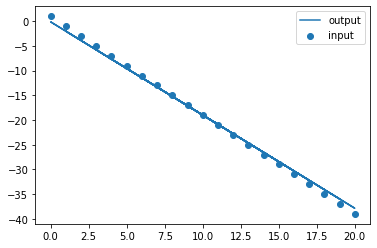

In [9]:
plt.scatter(x,y,label='input')
plt.plot(x,y1new,label='output')
plt.legend()
plt.show()

#### Try your function with any input parameterss of your choice.

#### Calculate r2 score

In [10]:
from sklearn.metrics import r2_score

s = r2_score(y,y1new)

print(s)

0.9967993088683615


In [3]:
import numpy as np

In [5]:
xnxx = np.arange(1, 101).tolist()
print(xnxx)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


#### Plot loss vs. epochs

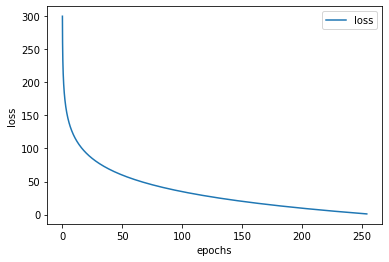

In [11]:
n=[]
j=1
for i in range (0,300):
    n.append(int(j))
    j=j+1
    


plt.plot(tloss,n,label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()    

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

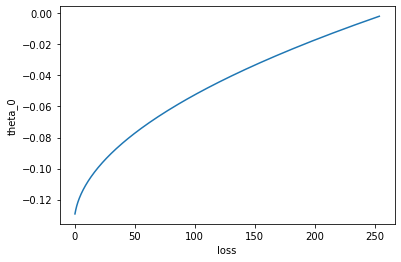

In [12]:
plt.plot(tloss,arrth0)
plt.ylabel('theta_0')
plt.xlabel('loss')
#plt.legend()
plt.show()    

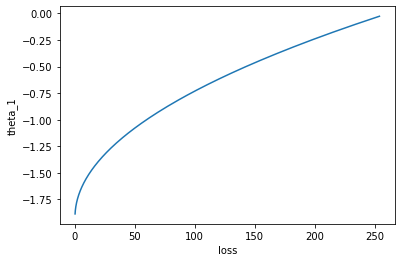

In [13]:
plt.plot(tloss,arrth1)
plt.ylabel('theta_1')
plt.xlabel('loss')
#plt.legend()
plt.show()    

#### Plot all regression lines till converge

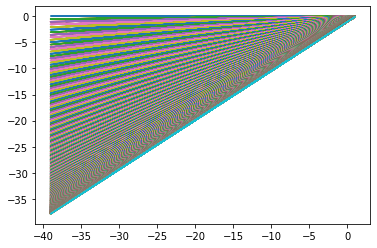

In [14]:

   
for i in range (0,len(reg)):
    plt.plot(y,reg[i])
    
    
plt.show()
    

#### Plot the best regression line

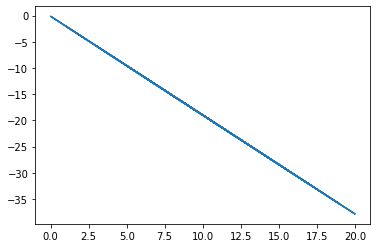

In [15]:
plt.plot(x,y1new,label='output')

plt.show()

In [16]:
def GD_batch(xmini,ymini,p0,p1,lr):
    
    
    
    hy=[]
    
    hy=hypo(p0,p1,xmini)
    
    hmy1=hminy(p0,p1,xmini,ymini)
    
    sm0= numpy.sum(hmy1)   
    mag0=(lr*(1/len(hmy1))*sm0) 
    pa0=p0-mag0
    
    hmyxx=hminymulx(p0,p1,xmini,ymini)
    sm1= numpy.sum(hmyxx)   
    mag1=(lr*(1/len(hmyxx))*sm1)            
    pa1=p1-mag1
    
    y1new=hypo(pa0,pa1,xmini)
    ernew=err(pa0,pa1,xmini,ymini)

    costnew = cost(ernew)
    
    return y1new , costnew  , pa0 , pa1
    

In [17]:
def div_batch(arr1,arr2,n):
    # n numberof batches
    # arr1 input
    # arr2 output 
    noele = len(x)//n
    index = 0
    arr1v=[] 
    arr2v=[]
    
    dash3=[] 
    dash4=[]
    
    for i in range (0,n):
        dash1=[] 
        dash2=[] 
        for j in range (0,noele):
            dash1.append(arr1[index])
            dash2.append(arr2[index])
            index+=1
        arr1v.append(dash1)
        arr2v.append(dash2)
        
    if index != (len(arr1)):
        for i in range (0,(len(arr1)-index)):
            dash3.append(arr1[index])
            dash4.append(arr2[index])
            index+=1
            
        arr1v.append(dash3)
        arr2v.append(dash4)       
    
    
    return arr1v , arr2v




            
    
            
    
    

In [18]:
# divide my data into batches
# n is number of batches
nobat = 5 
x_as_batches , y_as_batches = div_batch(x,y,nobat)
print(x_as_batches )
print(y_as_batches )


[[5, 11, 9, 1], [19, 14, 6, 17], [8, 12, 3, 13], [15, 7, 4, 16], [0, 2, 20, 10], [18]]
[[-9, -21, -17, -1], [-37, -27, -11, -33], [-15, -23, -5, -25], [-29, -13, -7, -31], [1, -3, -39, -19], [-35]]


In [43]:
def mini_batch(div1,div2,p0,p1,lr,ep):
    
    
    
    
    
    
    csot=0
    
    hyp_mini=[]
    cost_mini=[]
    th0_mini=[]
    th1_mini=[]
    
    th0_mini.append(p0)
    th1_mini.append(p1)
    
    
    hyp22=[]
    
        
    for i in range (0,len(div1)):
        for j in range (0,ep):
            hyp22 , cost , t0 , t1 =  GD_batch(div1[i],div2[i],p0,p1,lr)
            p0=t0
            p1=t1
            
        hyp_mini.append(hyp22)        
        cost_mini.append(cost)
        th0_mini.append(p0)
        th1_mini.append(p1)
        
        
    
    
    return hyp_mini , cost_mini  , th0_mini  , th1_mini 

In [44]:
import itertools
hyp_mini1=[]
cost_mini1=[]
th0_mini1=[]
th1_mini1=[]



hyp_mini1 , cost_mini1 , th0_mini1 ,th1_mini1  = mini_batch(x_as_batches,y_as_batches,0,0,0.0001,300)



yminibatch=list(itertools.chain.from_iterable(hyp_mini1))
xminibatch=list(itertools.chain.from_iterable(x_as_batches))

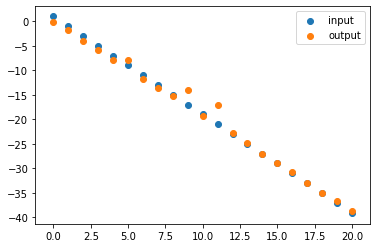

In [45]:
plt.scatter(x,y,label='input')
plt.scatter(xminibatch,yminibatch,label='output')
plt.legend()
plt.show()

In [39]:
s_mini = r2_score(y,yminibatch)

print(s_mini)

0.9896706567979161


## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [47]:
x_as_stoch , y_as_stoch = div_batch(x,y,len(x))
print(x_as_stoch )
print(x_as_stoch )

[[5], [11], [9], [1], [19], [14], [6], [17], [8], [12], [3], [13], [15], [7], [4], [16], [0], [2], [20], [10], [18]]
[[5], [11], [9], [1], [19], [14], [6], [17], [8], [12], [3], [13], [15], [7], [4], [16], [0], [2], [20], [10], [18]]


In [49]:
import itertools
hyp_stoc=[]
cost_stoc=[]
th0_stoc=[]
th1_stoc=[]



hyp_stoc ,cost_stoc , th0_stoc , th1_stoc = mini_batch(x_as_batches,y_as_batches,0,0,0.0001,300)



y_stoc=list(itertools.chain.from_iterable(hyp_mini1))
x_stoc=list(itertools.chain.from_iterable(x_as_batches))

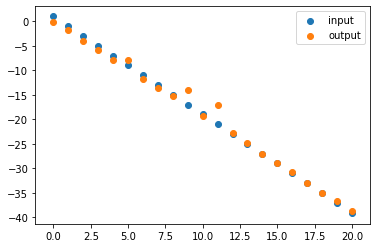

In [50]:
plt.scatter(x,y,label='input')
plt.scatter(x_stoc,y_stoc,label='output')
plt.legend()
plt.show()